<a href="https://colab.research.google.com/github/shyammodi11/Binary-Classification-ML-Models/blob/main/telecom_churn_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement: 
Churn is a one of the biggest problem in the telecom industry. Churn rate is the percentage of subscribers that discontinue/cancel their subscription to a service in a given time period. Every industry tries to attract new customers while avoiding contract terminations from pre-existing customers. 

Based on all past information like age, gender, expenses etc, this project attempts to build a model which will predict whether a particular customer will churn or not. This will help companies reduce churning rate and future contract terminations from existing users.

### This is a binary classification problem

In [ ]:
# importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset 
The dataset consists of 21 feature columns. There are 7043 rows. The output variable is named 'Churn'. Most columns have categorical type data, but 'tenure', 'MonthlyCharges' and 'TotalCharges' are numerical.



In [ ]:
df = pd.read_csv("/content/sample_data/telecom_churn.csv")
df.head()
# first 5 rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()
# datatypes of all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Checking for null/missing values

In [ ]:
df.isnull().sum()
# no null values found

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.drop("customerID",axis = 1, inplace = True) # not needed for modelling

In [ ]:
# Unique/distinct values in categorical feature columns
for col in df.select_dtypes(object):
  print(col)
  print(df[col].unique())

gender
['Female' 'Male']
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn
['No' 'Yes']


In [ ]:
df['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [ ]:
df['TotalCharges'].replace(' ', np.nan, inplace = True)
df['TotalCharges'].isnull().sum()

11

In [ ]:
df['TotalCharges'] = df['TotalCharges'].astype('float64')
m = df['TotalCharges'].mean()
df['TotalCharges'].fillna(m, inplace =True)

## Label Encoding 
(Treating Categorical data) - transforming into numerical data

In [ ]:
df_cat = df.select_dtypes(object)
df_num = df.select_dtypes(['float64', 'int64'])

In [ ]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            7043 non-null   object
 1   Partner           7043 non-null   object
 2   Dependents        7043 non-null   object
 3   PhoneService      7043 non-null   object
 4   MultipleLines     7043 non-null   object
 5   InternetService   7043 non-null   object
 6   OnlineSecurity    7043 non-null   object
 7   OnlineBackup      7043 non-null   object
 8   DeviceProtection  7043 non-null   object
 9   TechSupport       7043 non-null   object
 10  StreamingTV       7043 non-null   object
 11  StreamingMovies   7043 non-null   object
 12  Contract          7043 non-null   object
 13  PaperlessBilling  7043 non-null   object
 14  PaymentMethod     7043 non-null   object
 15  Churn             7043 non-null   object
dtypes: object(16)
memory usage: 880.5+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df_cat:
  df_cat[i] = le.fit_transform(df_cat[i])

# Visualizing distributions
Understanding data with respect to Churn feature. Handling outliers, skewsness and others inconsistencies.


column SeniorCitizen 1.8336327440928564


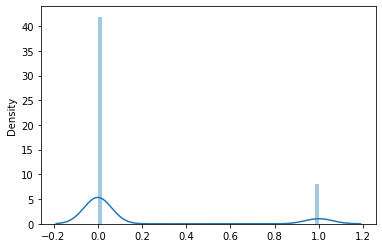

column tenure 0.2395397495619829


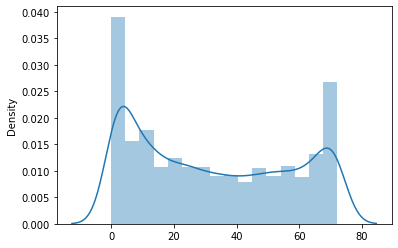

column MonthlyCharges -0.22052443394398033


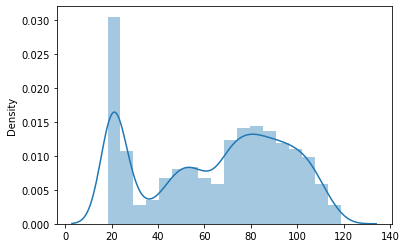

column TotalCharges 0.9623940229874866


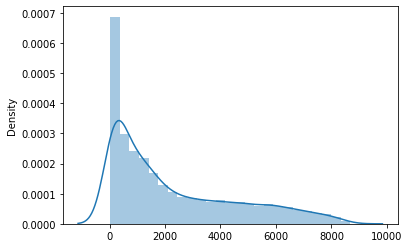

In [ ]:
# Checking distribution and Skewness
for i in df_num:
  print("column",i,df_num[i].skew())
  sns.distplot(df_num, x = df[i])
  plt.show()

In [ ]:
df_num['SeniorCitizen'] = np.sqrt(df_num['SeniorCitizen'])
# df_num['TotalCharges'] = np.sqrt(df_num['TotalCharges'])

In [ ]:
df_new = pd.concat([df_num, df_cat], axis = 1)

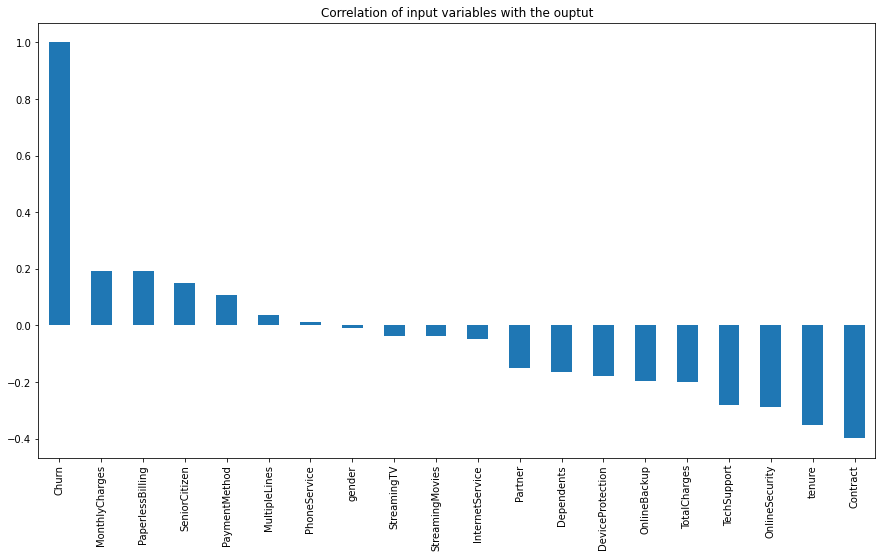

In [ ]:
# Understand the relation of input variable with the output variables using correlation
plt.figure(figsize=(15,8))
df_new.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')
plt.title("Correlation of input variables with the ouptut")
plt.show()

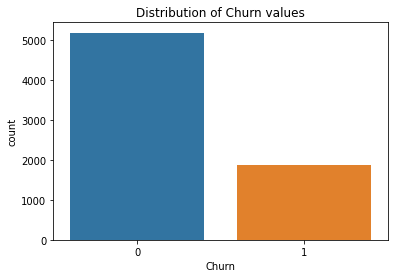

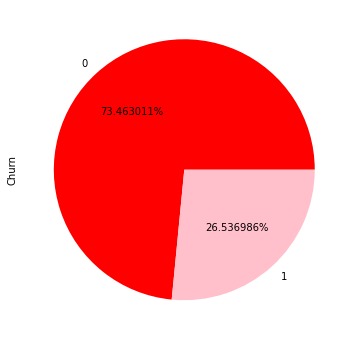

In [ ]:
# plt.subplots(1,2, figsize = (15,5))
sns.countplot(df_new['Churn'])
plt.title("Distribution of Churn values")
plt.figure(figsize = (6,6))
df_new['Churn'].value_counts().plot(kind="pie",autopct="%f%%",
                                     explode=(0,0),
                                     colors=["red","pink"])
plt.show()

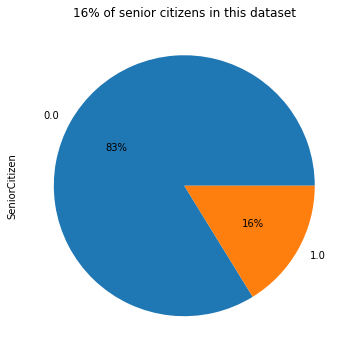

In [ ]:
plt.figure(figsize= (6,6))
plt.title("16% of senior citizens in this dataset")
df_new['SeniorCitizen'].value_counts().plot(kind="pie",autopct="%d%%",
                                     explode=(0,0))
plt.show()

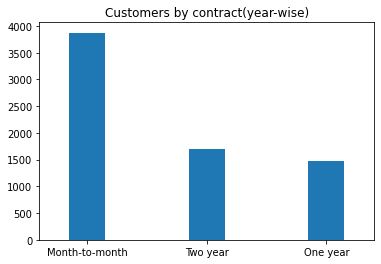

In [ ]:
ax = df['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3,)
plt.title("Customers by contract(year-wise)")
plt.show()

## Handling outliers

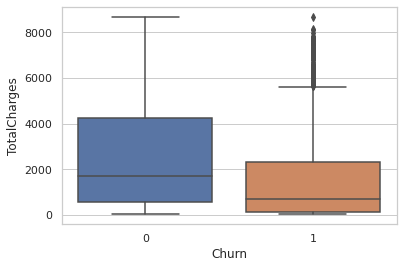

In [ ]:
# Treat Outliers
sns.set(style='whitegrid')
sns.boxplot(data = df_new, x = 'Churn', y = 'TotalCharges')
plt.show()

In [ ]:
df_new[(df_new['TotalCharges']>5800) & (df_new['Churn']==1)].index

Int64Index([ 104,  339,  402,  445,  609,  635,  799,  810,  811,  855,  889,
             975,  978, 1263, 1268, 1306, 1327, 1339, 1396, 1477, 1547, 1575,
            1612, 1701, 1840, 1950, 1981, 1988, 2019, 2029, 2204, 2277, 2282,
            2287, 2297, 2424, 2609, 2614, 2812, 2877, 2879, 2973, 2997, 3040,
            3111, 3439, 3517, 3694, 3730, 3788, 3849, 3890, 4074, 4083, 4140,
            4265, 4266, 4287, 4395, 4513, 4610, 4684, 4792, 4982, 4991, 5050,
            5127, 5258, 5414, 5541, 5544, 5579, 5581, 5684, 5697, 5702, 5765,
            6016, 6032, 6035, 6038, 6082, 6105, 6289, 6290, 6333, 6398, 6408,
            6448, 6537, 6605, 6785, 6853, 6945, 6972, 7034],
           dtype='int64')

In [ ]:
df_new.drop([ 104,  339,  402,  445,  609,  635,  799,  810,  811,  855,  889,
             975,  978, 1263, 1268, 1306, 1327, 1339, 1396, 1477, 1547, 1575,
            1612, 1701, 1840, 1950, 1981, 1988, 2019, 2029, 2204, 2277, 2282,
            2287, 2297, 2424, 2609, 2614, 2812, 2877, 2879, 2973, 2997, 3040,
            3111, 3439, 3517, 3694, 3730, 3788, 3849, 3890, 4074, 4083, 4140,
            4265, 4266, 4287, 4395, 4513, 4610, 4684, 4792, 4982, 4991, 5050,
            5127, 5258, 5414, 5541, 5544, 5579, 5581, 5684, 5697, 5702, 5765,
            6016, 6032, 6035, 6038, 6082, 6105, 6289, 6290, 6333, 6398, 6408,
            6448, 6537, 6605, 6785, 6853, 6945, 6972, 7034], inplace=True)

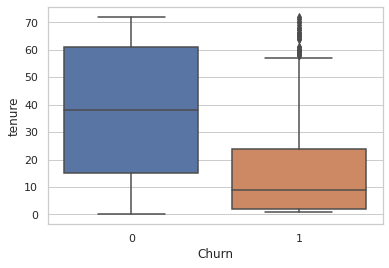

In [ ]:
sns.set(style='whitegrid')
sns.boxplot(data = df_new, x = 'Churn', y = 'tenure')
plt.show()

In [ ]:
df_new[(df_new['tenure']>57) & (df_new['Churn']==1)].index

Int64Index([ 168,  268,  335,  430,  828,  868,  873, 1171, 1365, 1967, 2480,
            2567, 3415, 3779, 3803, 4149, 4418, 4539, 4642, 4698, 5441, 5841,
            5992, 6357, 6424, 6507, 6724, 6813, 6824],
           dtype='int64')

In [ ]:
df_new.drop([ 168,  268,  335,  430,  828,  868,  873, 1171, 1365, 1967, 2480,
            2567, 3415, 3779, 3803, 4149, 4418, 4539, 4642, 4698, 5441, 5841,
            5992, 6357, 6424, 6507, 6724, 6813, 6824], inplace = True)

## Train-Test Split
Dividing data, standardizing and sampling training/testing set to balance the output variable.

In [ ]:
X = df_new.drop("Churn", axis = 1)
Y = df_new["Churn"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 1)

In [ ]:
# StandardScaler implemented
from sklearn.preprocessing import StandardScaler
# fit_transform on training data X_train, and transform on testing_data means  
# create object of StandardScaler class. Apply scaling only on input/independent variables

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
print("After scaling training data")
print(X_train)
print("After scaling testing data")
print(X_test)

After scaling training data
[[ 2.29255621 -0.55870948  0.99588946 ... -0.8218879  -1.19868238
  -1.47534433]
 [-0.43619432 -0.51771244  0.48930368 ... -0.8218879   0.83424935
  -1.47534433]
 [ 2.29255621  1.65513036  1.14419912 ...  1.5725653  -1.19868238
  -1.47534433]
 ...
 [-0.43619432  1.32715409  1.01921907 ...  1.5725653   0.83424935
  -0.54129396]
 [-0.43619432 -0.55870948  0.30433321 ... -0.8218879   0.83424935
   0.39275641]
 [-0.43619432  0.54821044  0.84258061 ... -0.8218879   0.83424935
  -0.54129396]]
After scaling testing data
[[-0.43619432 -0.51771244 -1.47871545 ...  1.5725653  -1.19868238
   1.32680678]
 [-0.43619432  1.57313629 -0.47220948 ...  1.5725653   0.83424935
  -1.47534433]
 [ 2.29255621  1.16316595  1.34416719 ...  0.3753387   0.83424935
   0.39275641]
 ...
 [ 2.29255621  0.63020451 -0.14726136 ...  1.5725653  -1.19868238
  -1.47534433]
 [-0.43619432  1.20416299  1.00422147 ... -0.8218879  -1.19868238
  -0.54129396]
 [-0.43619432 -0.51771244  1.30917278 ... -

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
# fit_resample() inbuilt method of RandomOverSampler() class

In [ ]:
X_train, Y_train = ros.fit_resample(X_train, Y_train)
X_test, Y_test = ros.fit_resample(X_test, Y_test)
pd.Series(Y_train).value_counts()

0    3634
1    3634
Name: Churn, dtype: int64

## Model building and implementation
Building a generalized function to implement our classification algorithms

In [ ]:
def create_model(model):
    model.fit(X_train,Y_train)#train the model
    Y_pred=model.predict(X_test) #test
    print(classification_report(Y_test,Y_pred))
    print("Confusion Matrix : ")
    #Confusion matrix
    print(confusion_matrix(Y_test,Y_pred))
    return model

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
#Base Line Model means use Logistic Regression(we predict yes/no values then 
#use classification algorithm)
from sklearn.linear_model import LogisticRegression

## Logistic Regression

In [ ]:
lr = LogisticRegression()
lr = create_model(lr)

              precision    recall  f1-score   support

           0       0.82      0.75      0.78      1540
           1       0.77      0.83      0.80      1540

    accuracy                           0.79      3080
   macro avg       0.79      0.79      0.79      3080
weighted avg       0.79      0.79      0.79      3080

Confusion Matrix : 
[[1154  386]
 [ 257 1283]]


In [ ]:
Y_pred=lr.predict(X_test)
print("Accuracy of our model is:",accuracy_score(Y_test,Y_pred))
print("Recall value of our model is:", recall_score(Y_test,Y_pred))

Accuracy of our model is: 0.7912337662337663
Recall value of our model is: 0.8331168831168831


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [ ]:
dtc1 = DecisionTreeClassifier(max_depth=6, min_samples_leaf = 30, max_leaf_nodes = 60) # max_depth cannot be more than 8
dtc1 = create_model(dtc1) # by default uses : gini index

              precision    recall  f1-score   support

           0       0.82      0.76      0.79      1540
           1       0.78      0.83      0.80      1540

    accuracy                           0.80      3080
   macro avg       0.80      0.80      0.80      3080
weighted avg       0.80      0.80      0.80      3080

Confusion Matrix : 
[[1176  364]
 [ 261 1279]]


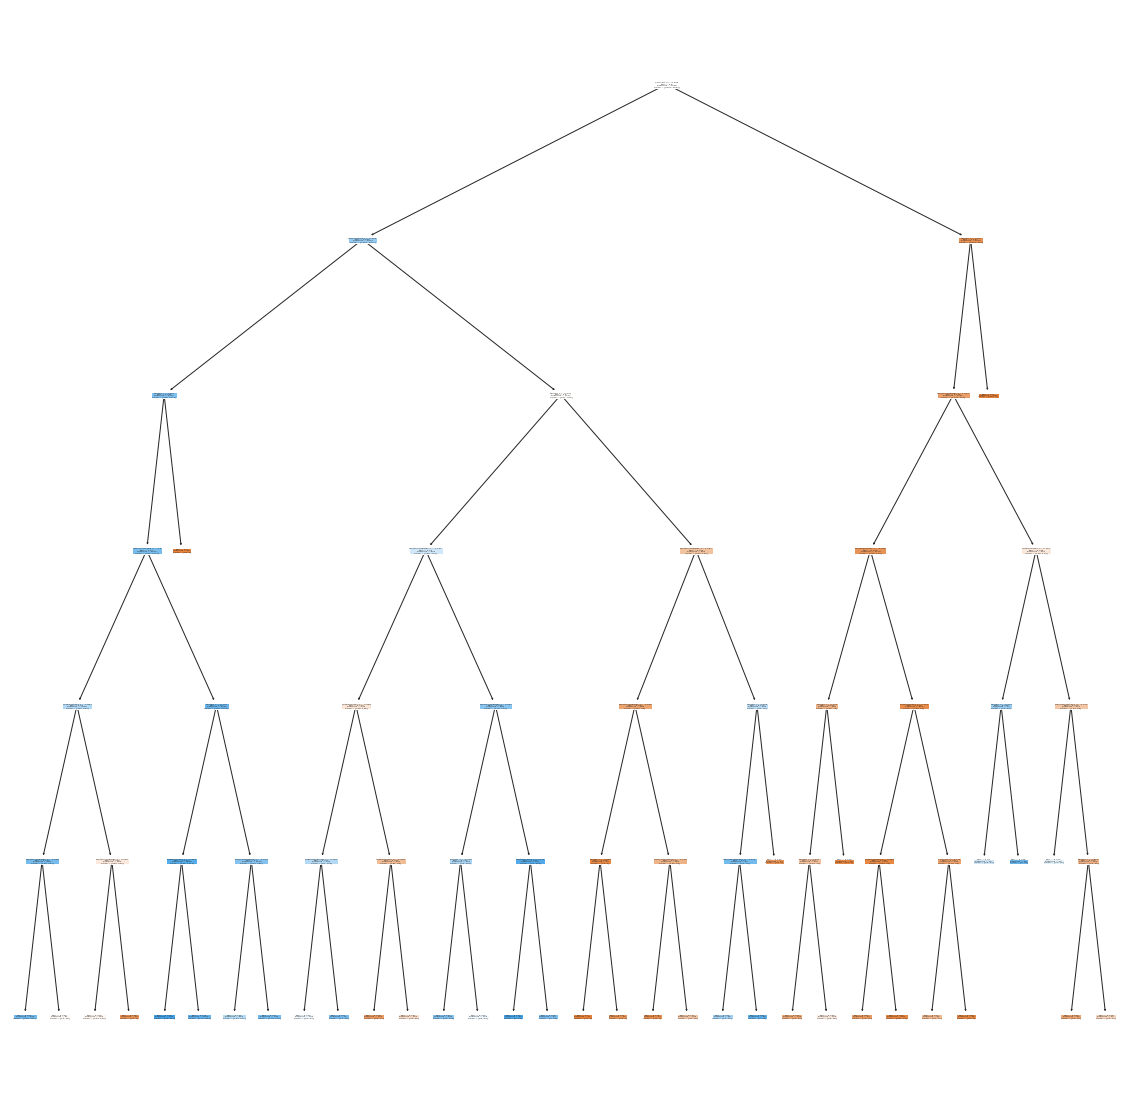

In [ ]:
from sklearn import tree
features = X.columns
fig = plt.figure(figsize = (20,20))
_= tree.plot_tree(dtc1, feature_names= features, filled = True)

In [ ]:
dtc2 = DecisionTreeClassifier(criterion='entropy', min_samples_leaf = 50, max_leaf_nodes = 45, max_features = 15)
dtc2 = create_model(dtc2)

              precision    recall  f1-score   support

           0       0.82      0.73      0.77      1540
           1       0.76      0.84      0.80      1540

    accuracy                           0.79      3080
   macro avg       0.79      0.79      0.78      3080
weighted avg       0.79      0.79      0.78      3080

Confusion Matrix : 
[[1130  410]
 [ 251 1289]]


In [ ]:
x = dtc2.feature_importances_
dic = {'Feature importance':x, 'Column':X.columns}
df2 = pd.DataFrame(dic)
print(df2)

    Feature importance            Column
0             0.008218     SeniorCitizen
1             0.143918            tenure
2             0.075272    MonthlyCharges
3             0.064937      TotalCharges
4             0.003676            gender
5             0.003057           Partner
6             0.000000        Dependents
7             0.000000      PhoneService
8             0.005912     MultipleLines
9             0.040248   InternetService
10            0.058675    OnlineSecurity
11            0.000000      OnlineBackup
12            0.008581  DeviceProtection
13            0.000000       TechSupport
14            0.008722       StreamingTV
15            0.006763   StreamingMovies
16            0.556405          Contract
17            0.009300  PaperlessBilling
18            0.006316     PaymentMethod


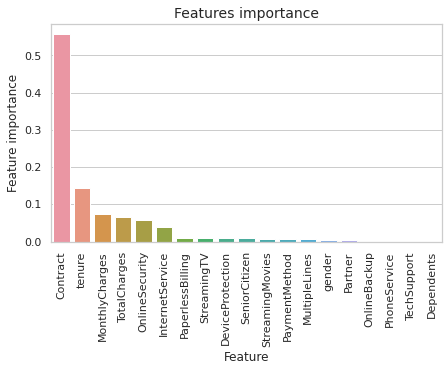

In [ ]:
tmp = pd.DataFrame({'Feature': X.columns, 'Feature importance': dtc2.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

In [ ]:
X_train.shape

(7268, 19)

## Random Forest

In [ ]:
# Random forest tree
# call random forest tree from package
from sklearn.ensemble import RandomForestClassifier
# call object of RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 10, max_features = 14, random_state = 1, max_depth= 6, min_samples_leaf= 34)
# n_estimators = 10 decision trees 
rfc = create_model(rfc) 

              precision    recall  f1-score   support

           0       0.85      0.74      0.79      1540
           1       0.77      0.87      0.82      1540

    accuracy                           0.81      3080
   macro avg       0.81      0.81      0.81      3080
weighted avg       0.81      0.81      0.81      3080

Confusion Matrix : 
[[1145  395]
 [ 196 1344]]


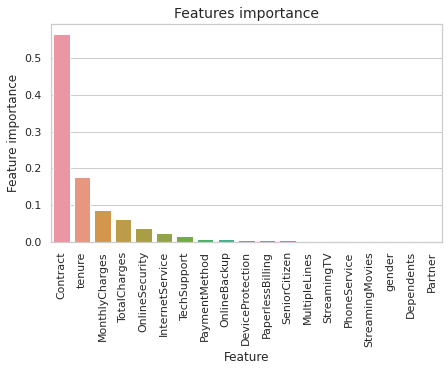

In [ ]:
tmp = pd.DataFrame({'Feature': X.columns, 'Feature importance': rfc.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.show()   

## Stacking

In [ ]:
# !pip install mlxtend
model_list = [lr, rfc, dtc2]
import six
import sys
sys.modules['sklearn.externals.six'] = six
from mlxtend.classifier import StackingClassifier
sc = StackingClassifier(classifiers = model_list, meta_classifier = LogisticRegression())

In [ ]:
sc = StackingClassifier(classifiers = model_list, meta_classifier = LogisticRegression())
sc = create_model(sc)

              precision    recall  f1-score   support

           0       0.85      0.75      0.80      1540
           1       0.78      0.87      0.82      1540

    accuracy                           0.81      3080
   macro avg       0.81      0.81      0.81      3080
weighted avg       0.81      0.81      0.81      3080

Confusion Matrix : 
[[1156  384]
 [ 206 1334]]


In [ ]:
Y_pred=sc.predict(X_test)
print("Accuracy of our stacking model is:",accuracy_score(Y_test,Y_pred))
print("Recall value of our model is:", recall_score(Y_test,Y_pred))

Accuracy of our stacking model is: 0.8084415584415584
Recall value of our model is: 0.8662337662337662


## Boosting Techniques

In [ ]:
#1. ADA Boost
from sklearn.ensemble import AdaBoostClassifier
#Create the object of AdaBoostClassifier class and passing the no. of parameter
#in this class
ada=AdaBoostClassifier(n_estimators= 35) # n_estimators can be <=100
ada = create_model(ada)

Y_pred=ada.predict(X_test)
print("\nAccuracy of our AdaBoost model is:",accuracy_score(Y_test,Y_pred))
print("Recall value of our model is:", recall_score(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.86      0.74      0.80      1540
           1       0.77      0.88      0.82      1540

    accuracy                           0.81      3080
   macro avg       0.82      0.81      0.81      3080
weighted avg       0.82      0.81      0.81      3080

Confusion Matrix : 
[[1146  394]
 [ 192 1348]]

Accuracy of our AdaBoost model is: 0.8097402597402598
Recall value of our model is: 0.8753246753246753


In [ ]:
# call GradientBoostingClassifier class from following package
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators = 35) # not>100
gbc = create_model(gbc)

              precision    recall  f1-score   support

           0       0.87      0.74      0.80      1540
           1       0.78      0.89      0.83      1540

    accuracy                           0.82      3080
   macro avg       0.82      0.82      0.82      3080
weighted avg       0.82      0.82      0.82      3080

Confusion Matrix : 
[[1147  393]
 [ 173 1367]]


In [ ]:
# ! pip install xgboost

In [ ]:
from xgboost import XGBClassifier
xgc = XGBClassifier(n_estimators = 50, reg_alpha = 4)
xgc = create_model(xgc)

Y_pred=xgc.predict(X_test)
print("\nAccuracy of our xgboost model is:",accuracy_score(Y_test,Y_pred))
print("Recall value of our model is:", recall_score(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.86      0.74      0.80      1540
           1       0.77      0.89      0.82      1540

    accuracy                           0.81      3080
   macro avg       0.82      0.81      0.81      3080
weighted avg       0.82      0.81      0.81      3080

Confusion Matrix : 
[[1133  407]
 [ 177 1363]]

Accuracy of our xgboost model is: 0.8103896103896104
Recall value of our model is: 0.8850649350649351


## Naive Bayes

In [ ]:
# Implement Naive Bayes algorithm
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb = create_model(gnb)

              precision    recall  f1-score   support

           0       0.83      0.73      0.78      1540
           1       0.76      0.85      0.81      1540

    accuracy                           0.79      3080
   macro avg       0.80      0.79      0.79      3080
weighted avg       0.80      0.79      0.79      3080

Confusion Matrix : 
[[1131  409]
 [ 225 1315]]


In [ ]:
Y_pred=gnb.predict(X_test)
print("Accuracy of our Naive Bayes model is:",accuracy_score(Y_test,Y_pred))
print("Recall value of our model is:", recall_score(Y_test,Y_pred))

Accuracy of our Naive Bayes model is: 0.7941558441558442
Recall value of our model is: 0.8538961038961039


# SVM

In [ ]:
from sklearn.svm import LinearSVC
# Support Vector Classifier : SVC
# create the object of LinearSVC class
svc = LinearSVC(random_state = 1)
svm = create_model(svc)

              precision    recall  f1-score   support

           0       0.82      0.75      0.78      1540
           1       0.77      0.84      0.80      1540

    accuracy                           0.79      3080
   macro avg       0.80      0.79      0.79      3080
weighted avg       0.80      0.79      0.79      3080

Confusion Matrix : 
[[1152  388]
 [ 247 1293]]


In [ ]:
# if data is not linearly separable
from sklearn.svm import SVC
poly_svc = SVC(random_state=1, kernel='poly')
poly_svc = create_model(poly_svc)

              precision    recall  f1-score   support

           0       0.79      0.76      0.78      1540
           1       0.77      0.80      0.78      1540

    accuracy                           0.78      3080
   macro avg       0.78      0.78      0.78      3080
weighted avg       0.78      0.78      0.78      3080

Confusion Matrix : 
[[1175  365]
 [ 311 1229]]


In [ ]:
# radial basis function
r_svc = SVC(random_state = 1, kernel='rbf')
r_svc = create_model(r_svc)

              precision    recall  f1-score   support

           0       0.79      0.76      0.78      1540
           1       0.77      0.80      0.79      1540

    accuracy                           0.78      3080
   macro avg       0.78      0.78      0.78      3080
weighted avg       0.78      0.78      0.78      3080

Confusion Matrix : 
[[1173  367]
 [ 304 1236]]


## KNN (K-Nearest Neighbors)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier(n_neighbors=13, metric='minkowski', p = 2)
KNC = create_model(KNC)

              precision    recall  f1-score   support

           0       0.82      0.68      0.74      1540
           1       0.73      0.86      0.79      1540

    accuracy                           0.77      3080
   macro avg       0.78      0.77      0.77      3080
weighted avg       0.78      0.77      0.77      3080

Confusion Matrix : 
[[1045  495]
 [ 223 1317]]


# Conclusion
In this machine learning project, a binary classifier was implemented using various classification algorithms to predict potential churn outcomes. Through this project, several techniques were applied to address feature selection,remove outliers/missing values and treat class imbalance issue.

All categorical type feature columns were transforming into numerical data. As most columns had discrete values. The entire dataset was then standardized to prepare it for classification.

## Results

Looking at model results, the best accuracy on the test set was achieved by the boosting technique algorithms. It is an ensemble meta-algorithm that converts weak learners to strong ones. Important features were showcased while using Decision tree and Random Forest.

**Accuracy of our AdaBoost model is: 0.8097402597402598**

**Recall value of Adaboost model is: 0.8753246753246753,
  F1: 0.82**

**Accuracy of our XGBoost model is: 0.8103896103896104**

**Recall value of XGBoost model is: 0.8850649350649351,
  F1: 0.83**

Stacking and Random forest algorithms also performed very well after some hyper-parameter tuning. 

Focus was on getting optimal Recall score (reducing False-negatives) as machine predicting not churn, but actual value being churn would be a major concern for the company and would lead to a loss of customers.
It also makes sense to compare F1 scores to get the model with the best score on jointly precision and recall.